## Classification

- We will train a model that can classify songs based on the 3 moods (Happy, Sad, Energetic)
- We will then use the model to predict the mood of a new song
- We will predict the general mood of a playlist based on the mood of the songs it contains
- We will predict the mood of the songs sung by a certain artist
- We will try to visualize trends in the Billboard Hot 100 playlist
- We will use data from Kaggle to identify trends using our classification model

In [1]:
#Importing the required libraries
import pandas as pd
import time
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from SpotifyUtils.utility_functions import *
from scipy import stats
from termcolor import colored
from sklearn.decomposition import PCA
import pickle

In [2]:
#Reading the dataset
spotify_songs = pd.read_csv('spotify_songs_by_mood.csv')
spotify_songs

,track_title,album_name,artist,release_year,song_length_ms,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,Mood
0,Walking On Sunshine,Katrina & The Waves,Katrina & The Waves,1985,238733,80,0.596,0.01160,0.596,0.869,0.173000,0.0678,-11.970,0.0370,0.944,109.902,4,Happy
1,Shut Up and Dance,TALKING IS HARD,WALK THE MOON,2014-12-02,199080,83,0.578,0.00701,0.578,0.866,0.000000,0.2570,-3.804,0.0619,0.619,128.038,4,Happy
2,Oh Happy Day,Oh Happy Day: The Best Of The Edwin Hawkins Si...,The Edwin Hawkins Singers,2001-08-07,308600,52,0.321,0.09610,0.321,0.462,0.000000,0.1020,-10.711,0.0346,0.457,116.782,4,Happy
3,Good To Be Alive (Hallelujah),Magazines Or Novels (Deluxe Edition),Andy Grammer,2014-08-05,189869,0,0.784,0.03770,0.784,0.882,0.000000,0.6500,-3.646,0.0451,0.699,120.017,4,Happy
4,Best Day Of My Life,Best Day Of My Life,American Authors,2013-03-19,194000,0,0.672,0.05450,0.672,0.901,0.000285,0.0792,-2.415,0.0353,0.507,99.989,4,Happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2084,Indestructible,Masterwork Indestructible,Ray Barretto,2009,256160,0,0.574,0.48700,0.574,0.600,0.000373,0.0602,-12.585,0.0582,0.837,109.189,4,Energetic
2085,Mi Ritmo Es Bueno,Historia De La Salsa,Bobby Valentin,2009,344226,0,0.548,0.56000,0.548,0.705,0.000125,0.1290,-7.929,0.0911,0.869,96.576,4,Energetic
2086,Quítate Tú,Anthology,Fania All Stars,2012-04-10,331720,0,0.751,0.51000,0.751,0.681,0.001550,0.9060,-5.255,0.0437,0.928,122.211,4,Energetic
2087,Ponte Duro,The Very Best of Fania All Stars (The Original...,Fania All Stars,2013-12-24,552533,0,0.441,0.63700,0.441,0.953,0.934000,0.1210,-6.409,0.0743,0.805,130.669,4,Energetic


### The time signature (also known as meter signature, metre signature, or measure signature) is a notational convention used in Western musical notation to specify how many beats (pulses) are contained in each measure (bar), and which note value is equivalent to a beat.
### Time Signature has a fixed set of values and shouls be treated as a categorical variable. Converting the time signature to categorical variable after analyzing the set of values in the current dataset.

In [3]:
spotify_songs['time_signature'].value_counts()

4    1942
3     119
5      18
1      10
Name: time_signature, dtype: int64

In [4]:
#Time signature needs to be changed to categorical variable
spotify_songs['time_signature'] = spotify_songs['time_signature'].map({4: 'Four', 3: 'Three', 5: 'Five', 1: 'One'})
spotify_songs

,track_title,album_name,artist,release_year,song_length_ms,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,Mood
0,Walking On Sunshine,Katrina & The Waves,Katrina & The Waves,1985,238733,80,0.596,0.01160,0.596,0.869,0.173000,0.0678,-11.970,0.0370,0.944,109.902,Four,Happy
1,Shut Up and Dance,TALKING IS HARD,WALK THE MOON,2014-12-02,199080,83,0.578,0.00701,0.578,0.866,0.000000,0.2570,-3.804,0.0619,0.619,128.038,Four,Happy
2,Oh Happy Day,Oh Happy Day: The Best Of The Edwin Hawkins Si...,The Edwin Hawkins Singers,2001-08-07,308600,52,0.321,0.09610,0.321,0.462,0.000000,0.1020,-10.711,0.0346,0.457,116.782,Four,Happy
3,Good To Be Alive (Hallelujah),Magazines Or Novels (Deluxe Edition),Andy Grammer,2014-08-05,189869,0,0.784,0.03770,0.784,0.882,0.000000,0.6500,-3.646,0.0451,0.699,120.017,Four,Happy
4,Best Day Of My Life,Best Day Of My Life,American Authors,2013-03-19,194000,0,0.672,0.05450,0.672,0.901,0.000285,0.0792,-2.415,0.0353,0.507,99.989,Four,Happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2084,Indestructible,Masterwork Indestructible,Ray Barretto,2009,256160,0,0.574,0.48700,0.574,0.600,0.000373,0.0602,-12.585,0.0582,0.837,109.189,Four,Energetic
2085,Mi Ritmo Es Bueno,Historia De La Salsa,Bobby Valentin,2009,344226,0,0.548,0.56000,0.548,0.705,0.000125,0.1290,-7.929,0.0911,0.869,96.576,Four,Energetic
2086,Quítate Tú,Anthology,Fania All Stars,2012-04-10,331720,0,0.751,0.51000,0.751,0.681,0.001550,0.9060,-5.255,0.0437,0.928,122.211,Four,Energetic
2087,Ponte Duro,The Very Best of Fania All Stars (The Original...,Fania All Stars,2013-12-24,552533,0,0.441,0.63700,0.441,0.953,0.934000,0.1210,-6.409,0.0743,0.805,130.669,Four,Energetic


### Analyzing the features per category ('Energetic'/'Happy','Sad')

General Description of features:
- Acousticness – More for sad songs (no electric sound)
- Danceability – max for energetic songs
- Energy – (measure of intensity) highest for energetic songs
- Instrumentalness (no vocals) – Sad songs will have high value
- Liveness - probability that a track was performed live (energetic songs should have more of this)
- Speechiness – presence of spoken words
- Valence – positiveness of a song
- Tempo – not much difference in the happy ans energetic songs
- Loudness – the more negative, the more quieter (Happy songs are more louder in my case, which looks like a discrepancy
- Popularity (Self Explanatory)

In [5]:
spotify_songs.groupby(['Mood']).mean()

,song_length_ms,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
Mood,,,,,,,,,,,,
Energetic,232819.117647,35.983584,0.656468,0.137480,0.656468,0.752094,0.184146,0.187543,-6.104308,0.076944,0.557143,121.692543
Happy,210301.603245,52.591445,0.641855,0.169861,0.641855,0.726696,0.022692,0.187156,-6.489912,0.063356,0.657681,121.373512
Sad,225519.202941,43.391176,0.525897,0.571192,0.525897,0.396467,0.097318,0.156308,-10.250565,0.057471,0.308774,116.720240


### Dropping danceability.1 as it is a redundant variable with same values but a different name

In [6]:
spotify_songs_featured = spotify_songs.drop(['danceability.1'], axis=1)
spotify_songs_featured.groupby(['Mood']).mean()

,song_length_ms,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
Mood,,,,,,,,,,,
Energetic,232819.117647,35.983584,0.656468,0.137480,0.752094,0.184146,0.187543,-6.104308,0.076944,0.557143,121.692543
Happy,210301.603245,52.591445,0.641855,0.169861,0.726696,0.022692,0.187156,-6.489912,0.063356,0.657681,121.373512
Sad,225519.202941,43.391176,0.525897,0.571192,0.396467,0.097318,0.156308,-10.250565,0.057471,0.308774,116.720240


### The violin plot shows that Happy songs are the most popular amongst the three categories.

<AxesSubplot:xlabel='Mood', ylabel='popularity'>

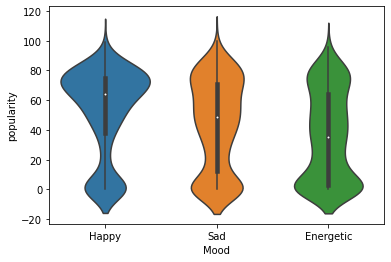

In [7]:
sns.violinplot(data=spotify_songs_featured, x='Mood' , y=spotify_songs_featured["popularity"])

### Visualizing the features for all 3 categories separately

In [8]:
# Initializing the min max scaler to scale the features before visulaizing them
min_max_scaler = MinMaxScaler()

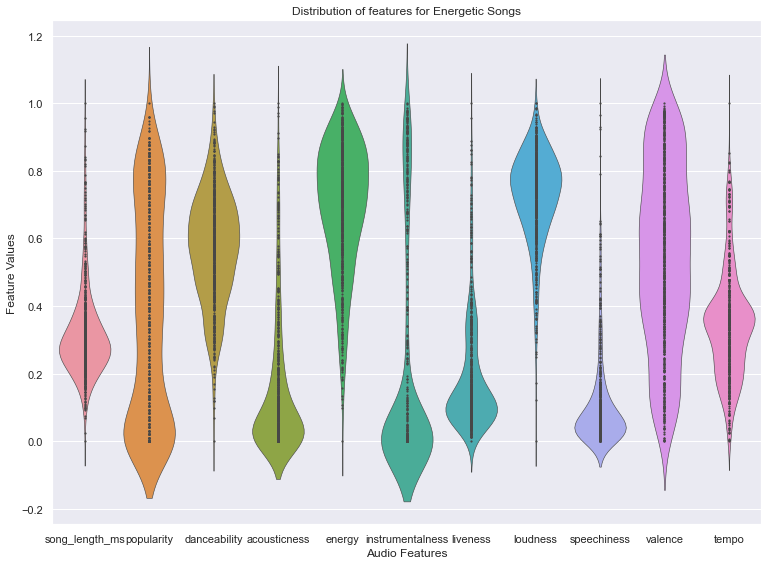

In [9]:
#Distribution of song features for the Energetic Mood Songs
c0 = spotify_songs_featured[spotify_songs_featured['Mood'] == 'Energetic']
energetic_feat = c0[['song_length_ms', 'popularity', 'danceability', 'acousticness',\
                     'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence', 'tempo']]

c0_scaled = min_max_scaler.fit_transform(energetic_feat.values)
energetic_feat = pd.DataFrame(c0_scaled)
energetic_feat.columns = ['song_length_ms', 'popularity', 'danceability', 'acousticness',\
                          'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',\
                          'valence', 'tempo']
val = energetic_feat.melt(var_name='groups', value_name='vals')
_ = sns.set(rc={'figure.figsize':(12.7,9.27)})
_ = sns.violinplot( data=val ,x="groups", y="vals", linewidth = 0.6, inner = 'point', scale= 'width')
_ = plt.title("Distribution of features for Energetic Songs")
_ = plt.ylabel("Feature Values")
_ = plt.xlabel("Audio Features")

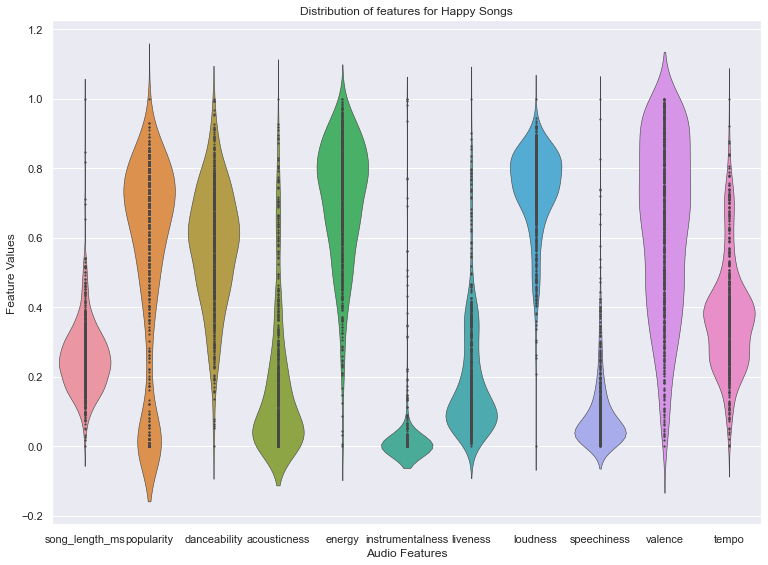

In [10]:
#Distribution of song features for the Happy Mood Songs
c1 = spotify_songs_featured[spotify_songs_featured['Mood'] == 'Happy']
happy_feat = c1[['song_length_ms', 'popularity', 'danceability', 'acousticness',\
                 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence', 'tempo']]

c1_scaled = min_max_scaler.fit_transform(happy_feat.values)
happy_feat = pd.DataFrame(c1_scaled)
happy_feat.columns = ['song_length_ms', 'popularity', 'danceability', 'acousticness', 'energy',\
                      'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence', 'tempo']
val = happy_feat.melt(var_name='groups', value_name='vals')
_ = sns.set(rc={'figure.figsize':(12.7,9.27)})
_ = sns.violinplot( data=val ,x="groups", y="vals", linewidth = 0.6, inner = 'point', scale= 'width')
_ = plt.title("Distribution of features for Happy Songs")
_ = plt.ylabel("Feature Values")
_ = plt.xlabel("Audio Features")

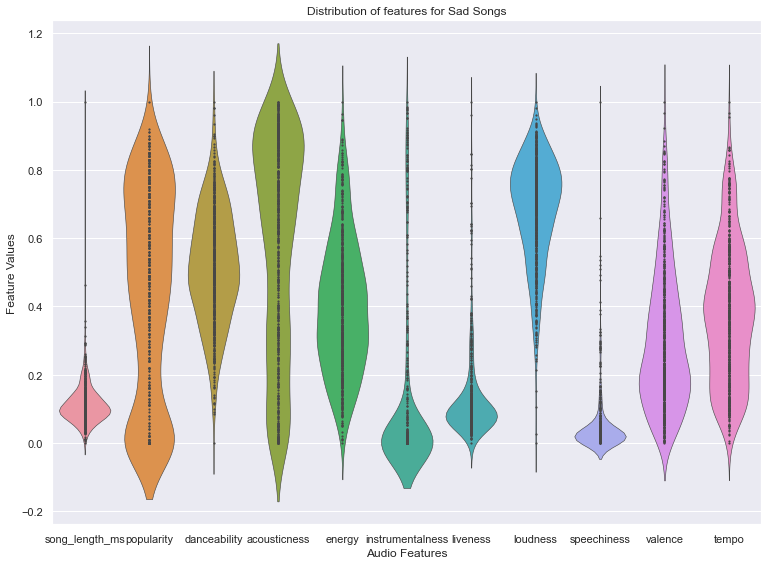

In [11]:
#Distribution of song features for the Sad Mood Songs
c2 = spotify_songs_featured[spotify_songs_featured['Mood'] == 'Sad']
sad_feat = c2[['song_length_ms', 'popularity', 'danceability', 'acousticness',\
               'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence', 'tempo']]

c2_scaled = min_max_scaler.fit_transform(sad_feat.values)
sad_feat = pd.DataFrame(c2_scaled)
sad_feat.columns = ['song_length_ms', 'popularity', 'danceability', 'acousticness',\
                    'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence', 'tempo']
val = sad_feat.melt(var_name='groups', value_name='vals')
_ = sns.set(rc={'figure.figsize':(12.7,9.27)})
_ = sns.violinplot( data=val ,x="groups", y="vals", linewidth = 0.6, inner = 'point', scale= 'width')
_ = plt.title("Distribution of features for Sad Songs")
_ = plt.ylabel("Feature Values")
_ = plt.xlabel("Audio Features")

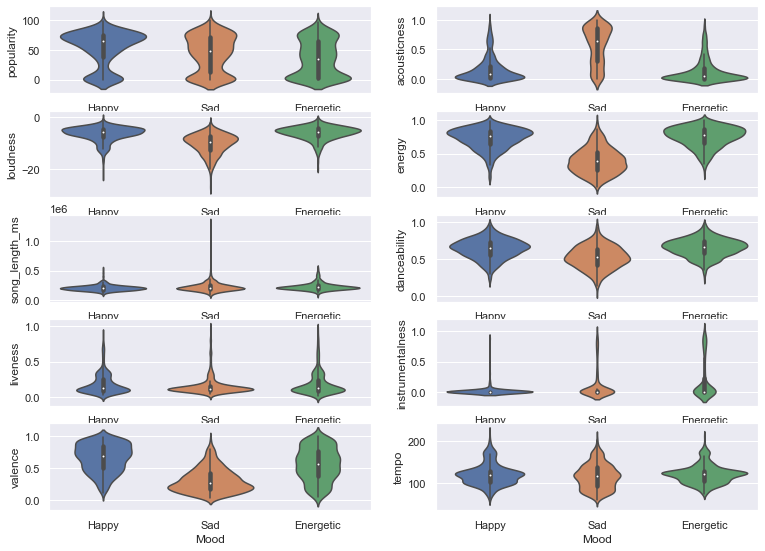

In [12]:
f, axes = plt.subplots(5, 2)
ax = sns.violinplot(data=spotify_songs_featured, x='Mood' , y=spotify_songs_featured["popularity"],\
                    ax=axes[0,0])
ax = sns.violinplot(data=spotify_songs_featured, x='Mood' , y=spotify_songs_featured["acousticness"],\
                    ax=axes[0,1])
ax = sns.violinplot(data=spotify_songs_featured, x='Mood' , y=spotify_songs_featured["loudness"],\
                    ax=axes[1,0])
ax = sns.violinplot(data=spotify_songs_featured, x='Mood' , y=spotify_songs_featured["energy"],\
                    ax=axes[1,1])
ax = sns.violinplot(data=spotify_songs_featured, x='Mood' , y=spotify_songs_featured["song_length_ms"],\
                    ax=axes[2,0])
ax = sns.violinplot(data=spotify_songs_featured, x='Mood' , y=spotify_songs_featured["danceability"],\
                    ax=axes[2,1])
ax = sns.violinplot(data=spotify_songs_featured, x='Mood' , y=spotify_songs_featured["liveness"],\
                    ax=axes[3,0])
ax = sns.violinplot(data=spotify_songs_featured, x='Mood' , y=spotify_songs_featured["instrumentalness"],\
                    ax=axes[3,1])
ax = sns.violinplot(data=spotify_songs_featured, x='Mood' , y=spotify_songs_featured["valence"],\
                    ax=axes[4,0])
ax = sns.violinplot(data=spotify_songs_featured, x='Mood' , y=spotify_songs_featured["tempo"],\
                    ax=axes[4,1])

### Now we will try to plot the correlation matrix to see if there is any correlation between the independent variables.

+ We can see that Energy and Loudness are positively correlated, which is also intuitive.
+ Also Danceability and Valence look related
+ Energy and Valence are also positively correlated

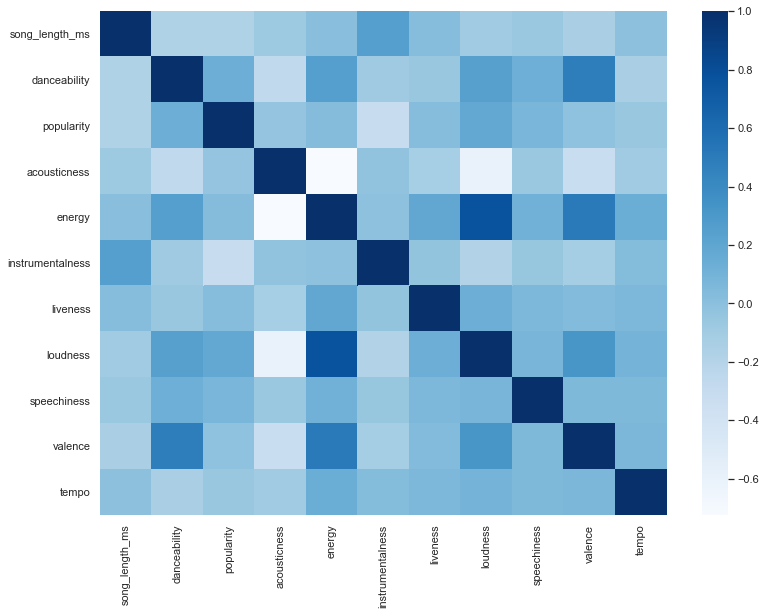

In [13]:
spotify_songs_CORR = spotify_songs_featured.copy()
#spotify_songs_CORR['Mood'] = spotify_songs_featured['Mood'].map({'Happy': 0, 'Sad': 1, 'Energetic': 2})
spotify_songs_CORR = spotify_songs_CORR[['song_length_ms', 'danceability', 'popularity', 'acousticness',
                                         'energy','instrumentalness','liveness','loudness','speechiness',
                                         'valence', 'tempo']]
_ = sns.heatmap(spotify_songs_CORR.corr(), cmap=plt.cm.Blues)
#We can see that Energy and Loudness are positively correlated, which is also intuitive.

In [14]:
spotify_songs_featured

,track_title,album_name,artist,release_year,song_length_ms,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,Mood
0,Walking On Sunshine,Katrina & The Waves,Katrina & The Waves,1985,238733,80,0.596,0.01160,0.869,0.173000,0.0678,-11.970,0.0370,0.944,109.902,Four,Happy
1,Shut Up and Dance,TALKING IS HARD,WALK THE MOON,2014-12-02,199080,83,0.578,0.00701,0.866,0.000000,0.2570,-3.804,0.0619,0.619,128.038,Four,Happy
2,Oh Happy Day,Oh Happy Day: The Best Of The Edwin Hawkins Si...,The Edwin Hawkins Singers,2001-08-07,308600,52,0.321,0.09610,0.462,0.000000,0.1020,-10.711,0.0346,0.457,116.782,Four,Happy
3,Good To Be Alive (Hallelujah),Magazines Or Novels (Deluxe Edition),Andy Grammer,2014-08-05,189869,0,0.784,0.03770,0.882,0.000000,0.6500,-3.646,0.0451,0.699,120.017,Four,Happy
4,Best Day Of My Life,Best Day Of My Life,American Authors,2013-03-19,194000,0,0.672,0.05450,0.901,0.000285,0.0792,-2.415,0.0353,0.507,99.989,Four,Happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2084,Indestructible,Masterwork Indestructible,Ray Barretto,2009,256160,0,0.574,0.48700,0.600,0.000373,0.0602,-12.585,0.0582,0.837,109.189,Four,Energetic
2085,Mi Ritmo Es Bueno,Historia De La Salsa,Bobby Valentin,2009,344226,0,0.548,0.56000,0.705,0.000125,0.1290,-7.929,0.0911,0.869,96.576,Four,Energetic
2086,Quítate Tú,Anthology,Fania All Stars,2012-04-10,331720,0,0.751,0.51000,0.681,0.001550,0.9060,-5.255,0.0437,0.928,122.211,Four,Energetic
2087,Ponte Duro,The Very Best of Fania All Stars (The Original...,Fania All Stars,2013-12-24,552533,0,0.441,0.63700,0.953,0.934000,0.1210,-6.409,0.0743,0.805,130.669,Four,Energetic


### Time signature doesn't help much here as most of the songs have a time signature 4, and so we will not use this for the song classification.

In [15]:
print(spotify_songs_featured['time_signature'].value_counts())
#sns.countplot(spotify_songs_featured['time_signature'])
#pd.pivot_table(spotify_songs, index=['time_signature'], values=['Mood'], aggfunc='count')

Four     1942
Three     119
Five       18
One        10
Name: time_signature, dtype: int64


<AxesSubplot:xlabel='Mood', ylabel='count'>

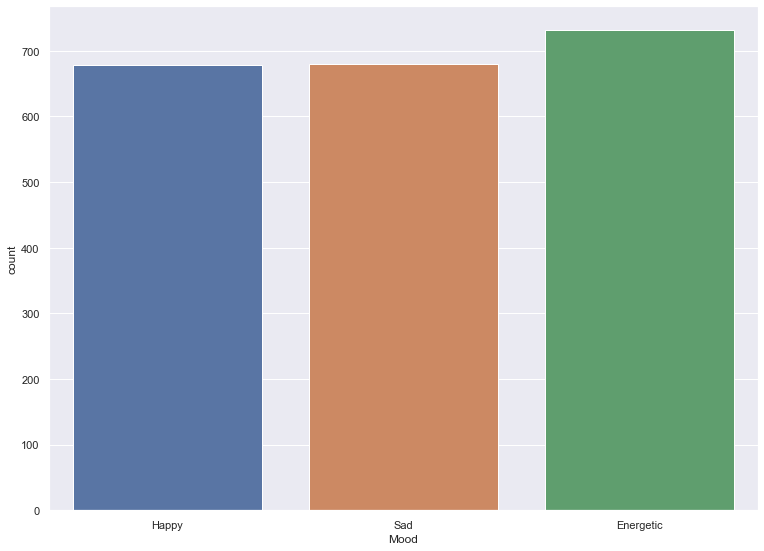

In [16]:
#Visualizing the number of songs in each category so that we can find if we have a balanced sample
sns.countplot(spotify_songs_featured['Mood'])

#### We will select the rest of the features and go ahead with creating the model.

In [17]:
# We are keeping the spotify_songs_featured_dropped data frame as a backup
# for trying out the model without this feature
spotify_songs_featured_dropped = spotify_songs_featured.drop(['liveness'], axis = 1)
spotify_songs_featured_dropped

,track_title,album_name,artist,release_year,song_length_ms,popularity,danceability,acousticness,energy,instrumentalness,loudness,speechiness,valence,tempo,time_signature,Mood
0,Walking On Sunshine,Katrina & The Waves,Katrina & The Waves,1985,238733,80,0.596,0.01160,0.869,0.173000,-11.970,0.0370,0.944,109.902,Four,Happy
1,Shut Up and Dance,TALKING IS HARD,WALK THE MOON,2014-12-02,199080,83,0.578,0.00701,0.866,0.000000,-3.804,0.0619,0.619,128.038,Four,Happy
2,Oh Happy Day,Oh Happy Day: The Best Of The Edwin Hawkins Si...,The Edwin Hawkins Singers,2001-08-07,308600,52,0.321,0.09610,0.462,0.000000,-10.711,0.0346,0.457,116.782,Four,Happy
3,Good To Be Alive (Hallelujah),Magazines Or Novels (Deluxe Edition),Andy Grammer,2014-08-05,189869,0,0.784,0.03770,0.882,0.000000,-3.646,0.0451,0.699,120.017,Four,Happy
4,Best Day Of My Life,Best Day Of My Life,American Authors,2013-03-19,194000,0,0.672,0.05450,0.901,0.000285,-2.415,0.0353,0.507,99.989,Four,Happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2084,Indestructible,Masterwork Indestructible,Ray Barretto,2009,256160,0,0.574,0.48700,0.600,0.000373,-12.585,0.0582,0.837,109.189,Four,Energetic
2085,Mi Ritmo Es Bueno,Historia De La Salsa,Bobby Valentin,2009,344226,0,0.548,0.56000,0.705,0.000125,-7.929,0.0911,0.869,96.576,Four,Energetic
2086,Quítate Tú,Anthology,Fania All Stars,2012-04-10,331720,0,0.751,0.51000,0.681,0.001550,-5.255,0.0437,0.928,122.211,Four,Energetic
2087,Ponte Duro,The Very Best of Fania All Stars (The Original...,Fania All Stars,2013-12-24,552533,0,0.441,0.63700,0.953,0.934000,-6.409,0.0743,0.805,130.669,Four,Energetic


In [18]:
# Feature vector
X = spotify_songs_featured.loc[:, 'danceability':'valence']

# Mapping class label to respected integer (Creating Target variable vector)
y = spotify_songs_featured['Mood'].map({'Happy': 0, 'Sad': 1, 'Energetic': 2})

#Normalize the features as they have different ranges
mx = MinMaxScaler()
X = mx.fit_transform(X)

In [19]:
#stratify=y has been used as the samples are not equally distributed in each category
#X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

## K Nearest Neighbors Classification Model

In [20]:
# Using gridsearch to find KNN best parameters
knn = KNeighborsClassifier()

parameters_knn = {'n_neighbors': range(0, 20),
                  'weights' : ['uniform', 'distance'],
                  'metric' : ['euclidean', 'manhattan', 'minkowski'],
                  'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_searcher_knn = GridSearchCV(estimator = knn, 
                                 param_grid = parameters_knn,
                                 cv = 10)
#grid_searcher_knn.fit(X_new, y)
grid_searcher_knn.fit(X, y)
print(grid_searcher_knn.best_params_)

{'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}


#### Using best parameters to create the model

In [21]:
model_KNN = KNeighborsClassifier(n_neighbors = grid_searcher_knn.best_params_['n_neighbors'],
                                 weights = grid_searcher_knn.best_params_['weights'],
                                 metric = grid_searcher_knn.best_params_['metric'],
                                 algorithm = grid_searcher_knn.best_params_['algorithm'])
model_KNN.fit(X_train, y_train)
y_pred = model_KNN.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.6842105263157895


In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.62      0.59       136
           1       0.85      0.85      0.85       136
           2       0.65      0.59      0.62       146

    accuracy                           0.68       418
   macro avg       0.69      0.69      0.69       418
weighted avg       0.69      0.68      0.68       418



In [23]:
#Saving the KNN model and Min Max scaler instances to be used by the Web App
pickle.dump(model_KNN, open('knn_model.pkl', 'wb'))
pickle.dump(mx, open('scaler.pkl', 'wb'))

In [24]:
target = pd.DataFrame({'mood':spotify_songs_featured['Mood'].tolist(),'encode':y}).drop_duplicates().sort_values(['encode'],ascending=True)
target

,mood,encode
0,Happy,0
678,Sad,1
1358,Energetic,2


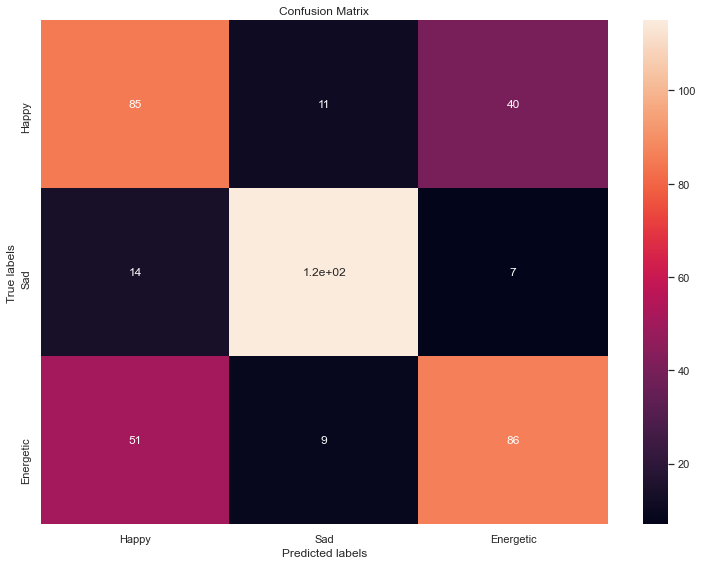

Accuracy Score 0.6842105263157895


In [25]:
cm = confusion_matrix(y_test,y_pred)
ax = plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)

labels = target['mood']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

print("Accuracy Score",accuracy_score(y_test, y_pred))

## Random Forest and Decision Tree Models

In [26]:
def random_forest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(random_state=42)
    clf = clf.fit(X_train, y_train)
    dtree = RandomForestClassifier( random_state=42)
    dtree.fit(X_train,y_train)
    predictions = dtree.predict(X_test)
    print("Random Forest Train Accuracy:", accuracy_score(y_train, dtree.predict(X_train)))
    print("Random Forest Test Accuracy:", accuracy_score(y_test, dtree.predict(X_test)))
    y_pred = dtree.predict(X_test)
    print('* Random Forest Classification Report')
    print(classification_report(y_test, y_pred))
    print('* Random Forest Confusion Matrix')
    print(confusion_matrix(y_test,predictions))
    dtree_train_accuracy = dtree.predict(X_train)
    dtree_test_accuracy = dtree.predict(X_test)
    return(dtree_train_accuracy, dtree_test_accuracy)

In [27]:
random_forest(X_train, X_test, y_train, y_test)

Random Forest Train Accuracy: 0.9856373429084381
Random Forest Test Accuracy: 0.69377990430622
* Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.59      0.60      0.60       136
           1       0.87      0.85      0.86       136
           2       0.63      0.64      0.63       146

    accuracy                           0.69       418
   macro avg       0.70      0.70      0.70       418
weighted avg       0.70      0.69      0.69       418

* Random Forest Confusion Matrix
[[ 82  10  44]
 [ 11 115  10]
 [ 46   7  93]]


(array([0, 1, 1, ..., 1, 1, 2]),
 array([2, 2, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 0, 1, 0, 2, 2, 2, 2, 1, 1,
        2, 0, 1, 0, 2, 2, 1, 2, 0, 0, 2, 2, 1, 2, 0, 1, 0, 0, 2, 0, 2, 1,
        0, 0, 1, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 2, 1, 1,
        1, 2, 2, 2, 0, 0, 1, 2, 1, 1, 0, 2, 2, 2, 1, 0, 1, 1, 1, 0, 1, 2,
        2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 1, 2, 2, 0, 2, 2, 1, 1, 0, 1, 2, 2,
        1, 0, 2, 0, 0, 1, 0, 1, 0, 2, 0, 0, 1, 0, 1, 0, 2, 2, 1, 0, 2, 2,
        0, 1, 1, 0, 1, 2, 1, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 2, 1, 1, 0, 1,
        2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 1, 0, 0, 1, 2, 2, 2, 1, 0, 0,
        2, 1, 2, 1, 0, 1, 0, 1, 1, 0, 1, 2, 0, 0, 1, 0, 1, 0, 2, 1, 0, 0,
        1, 1, 1, 0, 0, 1, 0, 0, 2, 1, 2, 2, 0, 2, 1, 0, 0, 2, 0, 1, 2, 2,
        0, 0, 1, 1, 2, 0, 2, 2, 2, 2, 2, 1, 0, 2, 1, 1, 1, 1, 0, 1, 2, 1,
        2, 2, 0, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 1, 2, 2, 0, 0, 2, 1, 2, 2,
        1, 1, 0, 0, 2, 1, 1, 1, 2, 1, 1, 0, 2, 0, 2, 0, 0, 2, 1, 0, 1, 1,
     

In [28]:
def decision_tree(X_train, X_test, y_train, y_test):
    clf = DecisionTreeClassifier(random_state=42)
    clf = clf.fit(X_train, y_train)
    dtree = DecisionTreeClassifier( random_state=42)
    dtree.fit(X_train,y_train)
    predictions = dtree.predict(X_test)
    print("Decision Tree Train Accuracy:", accuracy_score(y_train, dtree.predict(X_train)))
    print("Decision Tree Test Accuracy:", accuracy_score(y_test, dtree.predict(X_test)))
    y_pred = dtree.predict(X_test)
    print('* Decision Tree Classification Report')
    print(classification_report(y_test, y_pred))
    print('* Decision Tree Confusion Matrix')
    print(confusion_matrix(y_test,predictions))
    dtree_train_accuracy = dtree.predict(X_train)
    dtree_test_accuracy = dtree.predict(X_test)
    return(dtree_train_accuracy, dtree_test_accuracy)

In [29]:
decision_tree(X_train, X_test, y_train, y_test)

Decision Tree Train Accuracy: 0.9856373429084381
Decision Tree Test Accuracy: 0.5933014354066986
* Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.47      0.49      0.48       136
           1       0.79      0.76      0.77       136
           2       0.54      0.54      0.54       146

    accuracy                           0.59       418
   macro avg       0.60      0.59      0.60       418
weighted avg       0.60      0.59      0.60       418

* Decision Tree Confusion Matrix
[[ 66  15  55]
 [ 20 103  13]
 [ 55  12  79]]


(array([0, 1, 1, ..., 1, 1, 2]),
 array([2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 2, 0, 1, 2, 1, 1,
        1, 2, 1, 0, 0, 0, 1, 2, 0, 0, 2, 2, 2, 1, 0, 1, 0, 2, 0, 1, 2, 1,
        0, 0, 1, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 1, 2, 0, 2, 0, 0, 2, 1, 1,
        1, 0, 2, 2, 1, 2, 1, 2, 1, 1, 0, 2, 0, 0, 1, 0, 2, 2, 1, 0, 1, 2,
        1, 0, 0, 2, 2, 0, 0, 0, 2, 0, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1,
        0, 0, 0, 2, 0, 2, 0, 1, 2, 2, 0, 2, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0,
        0, 1, 1, 2, 1, 2, 0, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 0, 1, 0, 0, 1,
        2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 2, 0, 0, 1, 2, 0,
        0, 0, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 0, 0, 1, 0, 1, 0, 2, 1, 2, 0,
        0, 1, 1, 0, 0, 1, 0, 2, 0, 1, 1, 0, 0, 2, 1, 0, 2, 2, 2, 2, 2, 2,
        0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 1, 1, 1, 1, 0, 1, 2, 1,
        2, 2, 0, 1, 1, 2, 0, 1, 2, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2,
        1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 2, 2, 1, 1,
     

### As the KNN Model is ready , we can start predicting the mood of new songs and playlists

#### predict_new_song function is present in the utility_functions.py file in SpotifyUtils module
#### This functionality has also been presented in the form of a Web App

In [30]:
predict_new_song('2LcXJP95e4HKydTZ2mYfrx', model_KNN, mx)

 Tujh Mein Rab Dikhta Hai is a HAPPY song


In [31]:
predict_new_song('3NpNTYETMcXspfs8hE8T7h', model_KNN, mx)

 Ishq Tera Tadpave - Oh Ho Ho Ho is an ENERGETIC song


In [32]:
predict_new_song('5ubwXXOsH9bUhZsQ0Cybha', model_KNN, mx)

 Level Up is an ENERGETIC song


In [33]:
predict_new_song('33LC84JgLvK2KuW43MfaNq', model_KNN, mx)

 My Heart Will Go On - Love Theme from "Titanic" is a SAD song


In [34]:
predict_new_song('2dpaYNEQHiRxtZbfNsse99', model_KNN, mx)

 Happier is an ENERGETIC song


In [35]:
predict_new_song('0lHAMNU8RGiIObScrsRgmP', model_KNN, mx)

 Titanium (feat. Sia) is an ENERGETIC song


In [36]:
predict_new_song('463CkQjx2Zk1yXoBuierM9', model_KNN, mx)

 Levitating (feat. DaBaby) is a HAPPY song


In [37]:
predict_new_song('1kPpge9JDLpcj15qgrPbYX', model_KNN, mx)

 Good Time is a HAPPY song


In [38]:
predict_new_song('3Z2tPWiNiIpg8UMMoowHIk', model_KNN, mx)

 We Are The World is a SAD song


### Song Recommendation : Given 'Mood' as an input we will randomly select 5 songs from the current database and send them as recommendations

In [39]:
def recommend_songs_mood_based(mood_label):
    new_song_list = spotify_songs_featured.copy()
    return new_song_list[new_song_list['Mood'] == mood_label].sample(n = 5)

In [40]:
recommend_songs_mood_based('Happy')

,track_title,album_name,artist,release_year,song_length_ms,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,Mood
321,Sunlight,Sunlight,Yuno,2019-05-14,212160,6,0.398,0.00001,0.739,0.437,0.1170,-6.763,0.0318,0.529,76.982,Four,Happy
401,"These Days (feat. Jess Glynne, Macklemore & Da...","These Days (feat. Jess Glynne, Macklemore & Da...",Rudimental,2018-01-19,210772,78,0.653,0.19400,0.809,0.000,0.1650,-4.057,0.0474,0.550,92.213,Four,Happy
227,Peaches (feat. Daniel Caesar & Giveon),Justice,Justin Bieber,2021-03-19,198081,99,0.677,0.32100,0.696,0.000,0.4200,-6.181,0.1190,0.464,90.030,Four,Happy
340,Duurt Te Lang (Beste Zangers Seizoen 2019),Duurt Te Lang (Beste Zangers Seizoen 2019),Davina Michelle,2018-10-06,153527,65,0.638,0.12700,0.444,0.000,0.0905,-14.221,0.1960,0.151,173.707,Four,Happy
230,2002,Speak Your Mind (Deluxe),Anne-Marie,2018-04-27,186986,1,0.697,0.03720,0.683,0.000,0.1370,-2.881,0.1170,0.603,96.133,Four,Happy


In [41]:
recommend_songs_mood_based('Sad')

,track_title,album_name,artist,release_year,song_length_ms,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,Mood
1223,the remedy for a broken heart (why am I so in ...,?,XXXTENTACION,2018-03-16,160184,84,0.699,0.7790,0.3040,0.000993,0.1370,-11.192,0.0993,0.271,119.705,Four,Sad
1019,Marlboro,Till We Feel Something,Prince of Falls,2019-08-15,220682,49,0.777,0.0505,0.3110,0.000062,0.0847,-12.205,0.1020,0.221,133.985,Four,Sad
1312,Moonshiner,The High Lonesome Sound,Roscoe Holcomb,1998-01-20,120760,17,0.542,0.9540,0.0198,0.000000,0.2030,-16.934,0.0544,0.386,87.598,Three,Sad
965,The Station,The Station,hidingthehurt,2021-02-05,148039,38,0.499,0.0186,0.5950,0.000405,0.1180,-9.285,0.0315,0.210,146.004,Four,Sad
1285,No Distance Left to Run,Blur: The Best Of,Blur,2000-10-23,208266,38,0.419,0.7220,0.2080,0.031800,0.1080,-14.751,0.0339,0.108,148.070,Three,Sad


In [42]:
recommend_songs_mood_based('Energetic')

,track_title,album_name,artist,release_year,song_length_ms,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,Mood
2028,Hustler,Anthology,Willie Colón,2012-04-10,392493,0,0.462,0.7100,0.725,0.88600,0.254,-11.538,0.0433,0.880,108.441,Four,Energetic
1968,Feels Great (feat. Fetty Wap & CVBZ),Feels Great (feat. Fetty Wap & CVBZ),Cheat Codes,2017-10-13,193568,59,0.522,0.0454,0.833,0.00000,0.127,-3.715,0.0575,0.296,180.009,Four,Energetic
1603,Fall in Love Again,Alive,Tim McMorris,2014-10-22,195600,21,0.664,0.1010,0.793,0.00000,0.127,-3.805,0.0286,0.770,100.046,Four,Energetic
1427,Mountain at My Gates,What Went Down,Foals,2015-08-28,244293,53,0.495,0.0025,0.931,0.07830,0.246,-5.336,0.0469,0.617,104.050,Four,Energetic
1502,Running Out,Running Out,Matoma,2015-12-01,211200,58,0.601,0.0856,0.682,0.00384,0.132,-5.905,0.0338,0.170,94.999,Four,Energetic


### Predicting the mood of a playlist

In [43]:
#Upbeat Music Playlist
predict_playlist_mood(['https://open.spotify.com/playlist/7asgcWtFGTbpZjl87J1OZJ'], model_KNN, mx)

 The playlist is a HAPPY playlist


In [44]:
#Arijit Singh Songs
predict_playlist_mood(['https://open.spotify.com/playlist/37i9dQZF1DWYztMONFqfvX'], model_KNN, mx)

 The playlist is a SAD playlist


In [45]:
#Dua Lipa Songs
predict_playlist_mood(['https://open.spotify.com/playlist/37i9dQZF1DX3fRquEp6m8D'], model_KNN, mx)

 The playlist is an ENERGETIC playlist


### Visualization to identify trends in the Billboard Hot 100 weekly playlist

In [46]:
#Billboard Hot 100
predict_playlist_mood(['https://open.spotify.com/playlist/6UeSakyzhiEt4NB3UAd6NQ'], model_KNN, mx)

 The playlist is a HAPPY playlist


In [47]:
billboard_songs_tracks_list = []
billboard_songs_tracks_info_list = []
billboard_songs_playlist_urls = ['https://open.spotify.com/playlist/01U31LaM0JTWOnwkDlxwtT',#1950s
                                 'https://open.spotify.com/playlist/1hRrzeYlgh7jP7tIvR6t25',#1960s
                                 'https://open.spotify.com/playlist/6sIbGDTueYJbau2BaLxAjv',#1970s
                                 'https://open.spotify.com/playlist/0aZlRVfOfEs7wtZ0RGe1MY',#1980s
                                 'https://open.spotify.com/playlist/40TsZm82WOlbBGnsxtDAsr',#1990s
                                 'https://open.spotify.com/playlist/31KP612WR5mxlMk4s8BXkv',#2000s
                                 'https://open.spotify.com/playlist/45W2ZlhmOIgYANYVlZDn0Q']#2010s

In [48]:
billboard_songs_dataframe = track_features_from_url_list(billboard_songs_playlist_urls,
                                                         billboard_songs_tracks_list,
                                                         billboard_songs_tracks_info_list,
                                                         'None')
billboard_songs_dataframe

,track_title,album_name,artist,release_year,song_length_ms,popularity,danceability,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,Mood
0,Why,Frankie Avalon,Frankie Avalon,2008-12-01,157718,28,0.408,0.8690,0.408,0.213,0.000000,0.1010,-14.843,0.0295,0.643,94.608,4,None
1,El Paso,Gunfighter Ballads And Trail Songs,Marty Robbins,1959,259306,63,0.654,0.8350,0.654,0.452,0.000029,0.1600,-9.709,0.0300,0.691,106.662,3,None
2,The Big Hurt,The Big Hurt,Miss Toni Fisher,2014-08-02,134373,0,0.625,0.7240,0.625,0.576,0.000000,0.0992,-8.186,0.0293,0.730,123.896,4,None
3,It's Time To Cry,"Paul Anka Sings His Big Ten, Vol. 1",Paul Anka,1992-01-17,145466,29,0.311,0.7310,0.311,0.314,0.000000,0.3350,-12.810,0.0325,0.565,109.983,3,None
4,Way Down Yonder In New Orleans,Boom Boom Rock 'N' Roll,Freddy Cannon,2008-01-01,151600,22,0.278,0.4710,0.278,0.809,0.000000,0.1980,-6.068,0.0570,0.822,142.635,4,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Panda,New English,Desiigner,2016-06-26,246761,75,0.576,0.0280,0.576,0.766,0.000002,0.3660,-4.943,0.4490,0.236,144.833,4,None
696,Break Your Heart,The Rokstarr Hits Collection,Taio Cruz,2010-01-01,201546,74,0.607,0.0327,0.607,0.934,0.000000,0.0909,-4.217,0.0314,0.568,122.010,4,None
697,In My Feelings,Scorpion,Drake,2018-06-29,217925,79,0.835,0.0589,0.835,0.626,0.000060,0.3960,-5.833,0.1250,0.350,91.030,4,None
698,Wrecking Ball,Bangerz (Deluxe Version),Miley Cyrus,2013-10-04,221360,77,0.530,0.4070,0.530,0.422,0.000000,0.1070,-6.262,0.0342,0.349,119.964,4,None


In [49]:
decade_list = [1950]*100 + [1960]*100 + [1970]*100 + [1980]*100 + [1990]*100 + [2000]*100 + [2010]*100
#decade_list
billboard_songs_dataframe['decade'] = decade_list

In [50]:
billboard_songs_dataframe['decade'].value_counts()

1950    100
1960    100
1970    100
1980    100
1990    100
2000    100
2010    100
Name: decade, dtype: int64

## Predicting mood of all songs in the Billboard Decade Wise Playlists Dataframe and use it for further analysis

In [51]:
new_billboard_df = populate_mood_values_df(billboard_songs_dataframe, model_KNN, mx)

In [52]:
new_billboard_df

,track_title,album_name,artist,release_year,song_length_ms,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,Mood,decade
0,Why,Frankie Avalon,Frankie Avalon,2008-12-01,157718,28,0.408,0.8690,0.213,0.000000,0.1010,-14.843,0.0295,0.643,94.608,4,1,1950
1,El Paso,Gunfighter Ballads And Trail Songs,Marty Robbins,1959,259306,63,0.654,0.8350,0.452,0.000029,0.1600,-9.709,0.0300,0.691,106.662,3,1,1950
2,The Big Hurt,The Big Hurt,Miss Toni Fisher,2014-08-02,134373,0,0.625,0.7240,0.576,0.000000,0.0992,-8.186,0.0293,0.730,123.896,4,0,1950
3,It's Time To Cry,"Paul Anka Sings His Big Ten, Vol. 1",Paul Anka,1992-01-17,145466,29,0.311,0.7310,0.314,0.000000,0.3350,-12.810,0.0325,0.565,109.983,3,1,1950
4,Way Down Yonder In New Orleans,Boom Boom Rock 'N' Roll,Freddy Cannon,2008-01-01,151600,22,0.278,0.4710,0.809,0.000000,0.1980,-6.068,0.0570,0.822,142.635,4,0,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Panda,New English,Desiigner,2016-06-26,246761,75,0.576,0.0280,0.766,0.000002,0.3660,-4.943,0.4490,0.236,144.833,4,2,2010
696,Break Your Heart,The Rokstarr Hits Collection,Taio Cruz,2010-01-01,201546,74,0.607,0.0327,0.934,0.000000,0.0909,-4.217,0.0314,0.568,122.010,4,0,2010
697,In My Feelings,Scorpion,Drake,2018-06-29,217925,79,0.835,0.0589,0.626,0.000060,0.3960,-5.833,0.1250,0.350,91.030,4,2,2010
698,Wrecking Ball,Bangerz (Deluxe Version),Miley Cyrus,2013-10-04,221360,77,0.530,0.4070,0.422,0.000000,0.1070,-6.262,0.0342,0.349,119.964,4,1,2010


In [53]:
new_billboard_df.to_csv('billboard_decadewise_songs_data.csv', index=False)

## Visualization to identify various trends in songs from 1920 -2021
https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks

In [54]:
data_complete = pd.read_csv('kaggle_data/data.csv')
data_complete

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,0.009170,"['DJ Combo', 'Sander-7', 'Tony T']",0.792,147615,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.000060,6,0.1780,-5.089,0,The One,0,2020-12-25,0.0356,125.972,0.1860,2020
174385,0.795000,['Alessia Cara'],0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.000000,4,0.1960,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.2280,2021
174386,0.806000,['Roger Fly'],0.671,218147,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.920000,4,0.1130,-12.393,0,Together,0,2020-12-09,0.0282,108.058,0.7140,2020
174387,0.920000,['Taylor Swift'],0.462,244000,0.240,1,1gcyHQpBQ1lfXGdhZmWrHP,0.000000,0,0.1130,-12.077,1,champagne problems,69,2021-01-07,0.0377,171.319,0.3200,2021


In [55]:
data_complete = data_complete.rename(columns={'duration_ms': 'song_length_ms'})
data_complete_featured = data_complete[['year', 'song_length_ms', 'popularity', 'danceability',
                                      'acousticness','energy', 'instrumentalness', 'liveness',
                                      'loudness', 'speechiness', 'valence', 'tempo']]
data_complete_featured

,year,song_length_ms,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,1920,168333,12,0.598,0.991000,0.224,0.000522,0.3790,-12.628,0.0936,0.6340,149.976
1,1920,150200,7,0.852,0.643000,0.517,0.026400,0.0809,-7.261,0.0534,0.9500,86.889
2,1920,163827,4,0.647,0.993000,0.186,0.000018,0.5190,-12.098,0.1740,0.6890,97.600
3,1920,422087,17,0.730,0.000173,0.798,0.801000,0.1280,-7.311,0.0425,0.0422,127.997
4,1920,165224,2,0.704,0.295000,0.707,0.000246,0.4020,-6.036,0.0768,0.2990,122.076
...,...,...,...,...,...,...,...,...,...,...,...,...
174384,2020,147615,0,0.792,0.009170,0.866,0.000060,0.1780,-5.089,0.0356,0.1860,125.972
174385,2021,144720,0,0.429,0.795000,0.211,0.000000,0.1960,-11.665,0.0360,0.2280,94.710
174386,2020,218147,0,0.671,0.806000,0.589,0.920000,0.1130,-12.393,0.0282,0.7140,108.058
174387,2021,244000,69,0.462,0.920000,0.240,0.000000,0.1130,-12.077,0.0377,0.3200,171.319


## Predicting mood of all songs in the Songs List 1920-2021 and use it for further analysis

In [56]:
labelled_complete_data = populate_mood_values_df(data_complete_featured, model_KNN, mx)
labelled_complete_data

,year,song_length_ms,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,Mood
0,1920,168333,12,0.598,0.991000,0.224,0.000522,0.3790,-12.628,0.0936,0.6340,149.976,1
1,1920,150200,7,0.852,0.643000,0.517,0.026400,0.0809,-7.261,0.0534,0.9500,86.889,2
2,1920,163827,4,0.647,0.993000,0.186,0.000018,0.5190,-12.098,0.1740,0.6890,97.600,1
3,1920,422087,17,0.730,0.000173,0.798,0.801000,0.1280,-7.311,0.0425,0.0422,127.997,2
4,1920,165224,2,0.704,0.295000,0.707,0.000246,0.4020,-6.036,0.0768,0.2990,122.076,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,2020,147615,0,0.792,0.009170,0.866,0.000060,0.1780,-5.089,0.0356,0.1860,125.972,2
174385,2021,144720,0,0.429,0.795000,0.211,0.000000,0.1960,-11.665,0.0360,0.2280,94.710,1
174386,2020,218147,0,0.671,0.806000,0.589,0.920000,0.1130,-12.393,0.0282,0.7140,108.058,2
174387,2021,244000,69,0.462,0.920000,0.240,0.000000,0.1130,-12.077,0.0377,0.3200,171.319,1


In [57]:
data_complete['Mood'] = labelled_complete_data['Mood']
data_complete

,acousticness,artists,danceability,song_length_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,Mood
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920,1
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920,2
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920,1
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920,2
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,0.009170,"['DJ Combo', 'Sander-7', 'Tony T']",0.792,147615,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.000060,6,0.1780,-5.089,0,The One,0,2020-12-25,0.0356,125.972,0.1860,2020,2
174385,0.795000,['Alessia Cara'],0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.000000,4,0.1960,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.2280,2021,1
174386,0.806000,['Roger Fly'],0.671,218147,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.920000,4,0.1130,-12.393,0,Together,0,2020-12-09,0.0282,108.058,0.7140,2020,2
174387,0.920000,['Taylor Swift'],0.462,244000,0.240,1,1gcyHQpBQ1lfXGdhZmWrHP,0.000000,0,0.1130,-12.077,1,champagne problems,69,2021-01-07,0.0377,171.319,0.3200,2021,1


In [58]:
data_complete.to_csv('labelled_songs_data.csv', index=False)

In [59]:
data_by_year = pd.read_csv('kaggle_data/data_by_year.csv')
data_by_year

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,1920,0.631242,0.515750,238092.997135,0.418700,0.354219,0.216049,-12.654020,0.082984,113.226900,0.498210,0.610315,2,1
1,1921,0.862105,0.432171,257891.762821,0.241136,0.337158,0.205219,-16.811660,0.078952,102.425397,0.378276,0.391026,2,1
2,1922,0.828934,0.575620,140135.140496,0.226173,0.254776,0.256662,-20.840083,0.464368,100.033149,0.571190,0.090909,5,1
3,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.205405,0,1
4,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2017,0.207413,0.580475,243402.249536,0.686392,0.247068,0.231513,-8.026319,0.096717,121.829807,0.436313,31.662338,1,1
98,2018,0.233836,0.602731,227073.140015,0.659552,0.229874,0.231009,-8.173434,0.121045,123.644288,0.426566,27.599484,7,1
99,2019,0.261344,0.603101,225463.326320,0.629781,0.221123,0.218501,-8.527674,0.106820,122.419702,0.457813,32.346930,7,1
100,2020,0.202303,0.605285,218977.482767,0.674247,0.249008,0.234415,-8.077563,0.100629,124.058308,0.468030,24.064741,0,1


In [60]:
data_by_year = data_by_year.rename(columns={'duration_ms': 'song_length_ms'})
data_by_year_featured = data_by_year[['year', 'song_length_ms', 'popularity', 'danceability',
                                      'acousticness','energy', 'instrumentalness', 'liveness',
                                      'loudness', 'speechiness', 'valence', 'tempo']]
data_by_year_featured

,year,song_length_ms,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,1920,238092.997135,0.610315,0.515750,0.631242,0.418700,0.354219,0.216049,-12.654020,0.082984,0.498210,113.226900
1,1921,257891.762821,0.391026,0.432171,0.862105,0.241136,0.337158,0.205219,-16.811660,0.078952,0.378276,102.425397
2,1922,140135.140496,0.090909,0.575620,0.828934,0.226173,0.254776,0.256662,-20.840083,0.464368,0.571190,100.033149
3,1923,177942.362162,5.205405,0.577341,0.957247,0.262406,0.371733,0.227462,-14.129211,0.093949,0.625492,114.010730
4,1924,191046.707627,0.661017,0.549894,0.940200,0.344347,0.581701,0.235219,-14.231343,0.092089,0.663725,120.689572
...,...,...,...,...,...,...,...,...,...,...,...,...
97,2017,243402.249536,31.662338,0.580475,0.207413,0.686392,0.247068,0.231513,-8.026319,0.096717,0.436313,121.829807
98,2018,227073.140015,27.599484,0.602731,0.233836,0.659552,0.229874,0.231009,-8.173434,0.121045,0.426566,123.644288
99,2019,225463.326320,32.346930,0.603101,0.261344,0.629781,0.221123,0.218501,-8.527674,0.106820,0.457813,122.419702
100,2020,218977.482767,24.064741,0.605285,0.202303,0.674247,0.249008,0.234415,-8.077563,0.100629,0.468030,124.058308


In [61]:
feature_arr = data_by_year_featured.loc[:, 'danceability':'valence']
feature_arr
tfmd_arr = mx.transform(feature_arr)
predicted_vals_by_year = model_KNN.predict(tfmd_arr)
predicted_vals_by_year

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1])

In [62]:
predicted_year_and_mood_of_songs = pd.DataFrame([data_by_year_featured['year'], predicted_vals_by_year]).T
predicted_year_and_mood_of_songs.columns = ['year', 'PredictedMood']
predicted_year_and_mood_of_songs['PredictedMood'] = predicted_year_and_mood_of_songs['PredictedMood'].map({0 : 'Happy', 1 : 'Sad', 2: 'Energetic'})
predicted_year_and_mood_of_songs

,year,PredictedMood
0,1920,Sad
1,1921,Sad
2,1922,Sad
3,1923,Sad
4,1924,Sad
...,...,...
97,2017,Energetic
98,2018,Sad
99,2019,Sad
100,2020,Energetic


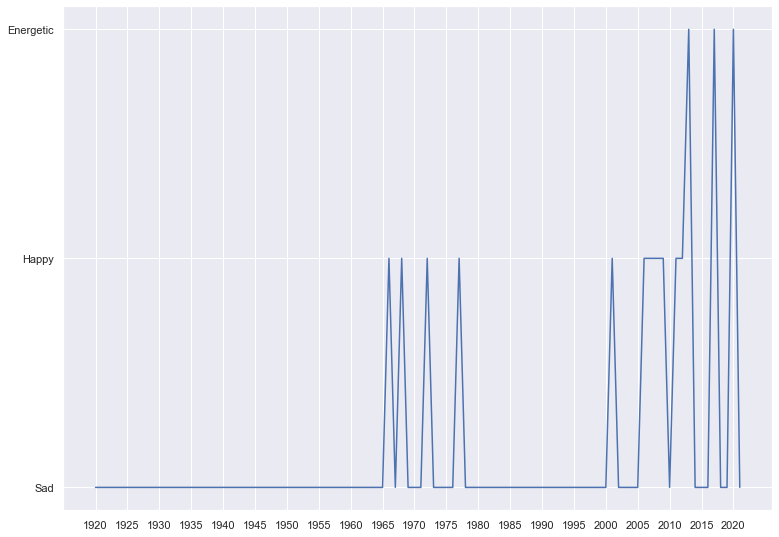

In [63]:
names = predicted_year_and_mood_of_songs['year']
values = predicted_year_and_mood_of_songs['PredictedMood']
plt.plot(names, values, label="Mood")
plt.xticks(np.arange(1920, 2021, step=5))
plt.show()

#### We can very well see from the graph above that from 1920 to almost 1996 maximum song features were similar to those of Sad songs. After 1996, we see a mix of Sad, Energetic and Happy Songs.

In [64]:
data_by_artist = pd.read_csv('kaggle_data/data_by_artist.csv')
data_by_artist = data_by_artist.rename(columns={'duration_ms': 'song_length_ms'})
data_by_artist_featured = data_by_artist[['artists', 'song_length_ms', 'popularity', 'danceability',
                                      'acousticness','energy', 'instrumentalness', 'liveness',
                                      'loudness', 'speechiness', 'valence', 'tempo']]
feature_arr = data_by_artist_featured.loc[:, 'danceability':'valence']
feature_arr
tfmd_arr = mx.transform(feature_arr)
predicted_vals_by_artists = model_KNN.predict(tfmd_arr)
predicted_vals_by_artists
predicted_artists_and_mood_of_songs = pd.DataFrame([data_by_artist_featured['artists'], predicted_vals_by_artists]).T
predicted_artists_and_mood_of_songs.columns = ['Artists', 'PredictedMood']
predicted_artists_and_mood_of_songs['PredictedMood'] = predicted_artists_and_mood_of_songs['PredictedMood'].map({0 : 'Happy', 1 : 'Sad', 2: 'Energetic'})

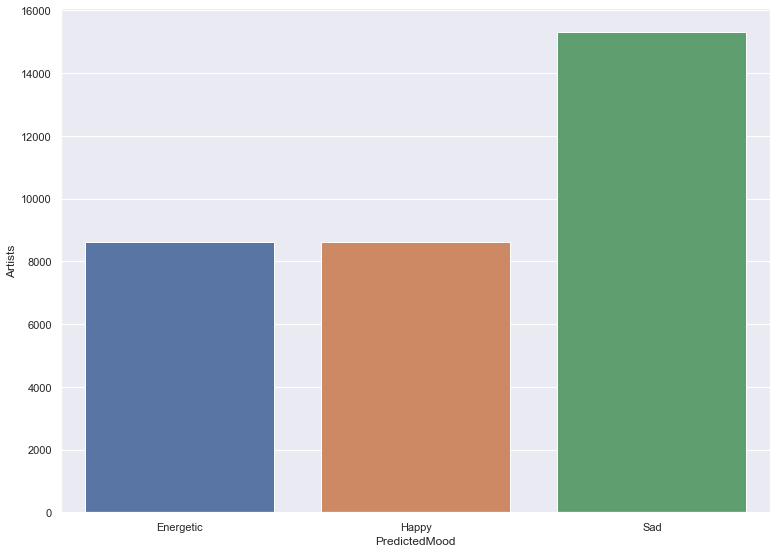

In [65]:
predicted_artists_and_mood_of_songs.groupby('PredictedMood').count()
df = pd.pivot_table(predicted_artists_and_mood_of_songs, index = ['PredictedMood'], 
                    values = ['Artists'], 
                    aggfunc = 'count').to_records()
artists_moods_df = pd.DataFrame(df)
artists_moods_df
_ = sns.barplot(x = artists_moods_df['PredictedMood'], y = artists_moods_df['Artists'])

#### A similar trend is seen when we group artists by Mood, Maximum artists have songs that belong to the Sad Mood.

### Attempt to use Deep Learning Model

In [67]:
#Libraries to create the Multi-class Neural Network
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
#Import tensorflow and disable the v2 behavior and eager mode
import tensorflow as tf

Using TensorFlow backend.


In [68]:
def base_model():
    #Create the model
    model = Sequential()
    #input dim is num of features
    #Add 1 layer with 8 nodes,input of 3 dim with relu function
    model.add(Dense(8,input_dim=8,activation='relu'))
    #Add 1 layer with output 3 and softmax function
    model.add(Dense(3,activation='softmax'))
    #Compile the model using sigmoid loss function and adam optim
    model.compile(loss='categorical_crossentropy',optimizer='adam',
                 metrics=['accuracy'])
    return model

In [69]:
from sklearn.model_selection import cross_val_score, KFold
#Configure the model
estimator = KerasClassifier(build_fn=base_model,epochs=300,batch_size=200,verbose=0)

#Evaluate the model using KFold cross validation
kfold = KFold(n_splits=10,shuffle=True)
results = cross_val_score(estimator,X,y,cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100,results.std()*100))


Baseline: 67.07% (3.20%)


In [70]:
estimator.fit(X_train,y_train)
y_predsA = estimator.predict(X_test)

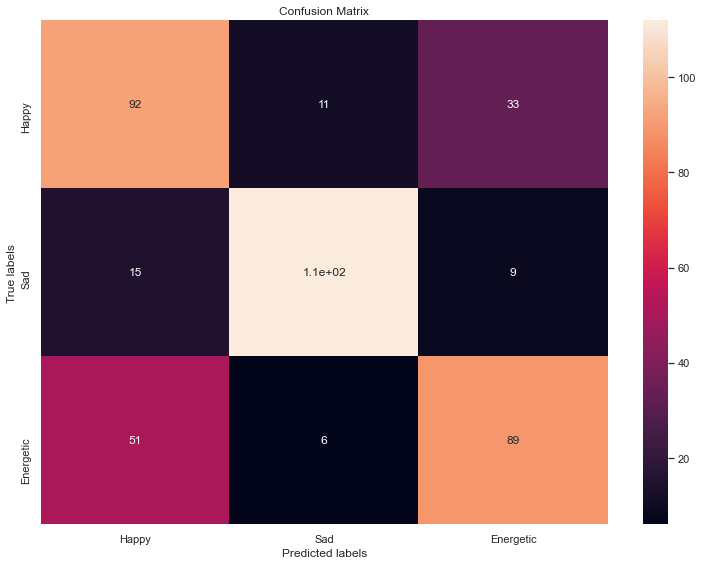

Accuracy Score 0.7009569377990431


In [71]:
cm = confusion_matrix(y_test,y_predsA)
ax = plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)

labels = target['mood']
#print(labels)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

print("Accuracy Score",colored(accuracy_score(y_test,y_predsA), 'red'))